Disclaimer:

    Lisensi Data: Unknown
    
    Sumber Data: https://www.kaggle.com/mcdonalds/nutrition-facts/metadata

<h4>Kita Import Dulu Libraries nya</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import pylab as plb
import seaborn as sns
from scipy.stats import norm
from scipy import stats
#import plotly.graph_objs as go
%matplotlib inline

<h5>Load Files yang dibutuhkan</h5>

In [2]:
menu = pd.read_csv('menu.csv')
print('Dataset is loaded')
#menu.head(3)

Dataset is loaded


<h5>Coba kita visualisasikan dulu Persentase Jumah Menu per Kategori</h5>

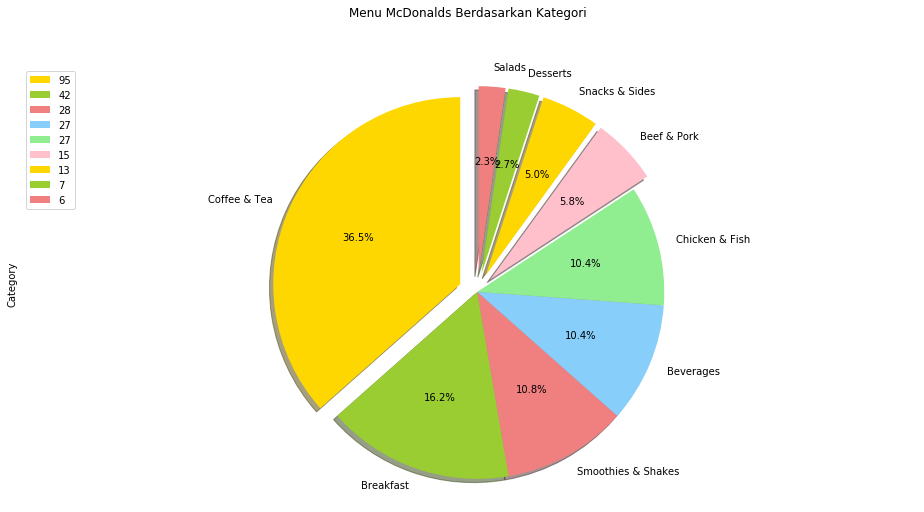

In [18]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1]
menu.Category.value_counts().plot(kind='pie', autopct='%1.1f%%',
                                 colors=colors_list,
                                 explode=explode_list,
                                 shadow=True,
                                 startangle=90,
                                 figsize=(16, 8))
plt.title('Menu McDonalds Berdasarkan Kategori', y=1.1)
plt.axis('equal')
plt.legend(labels=menu.Category.value_counts(), loc='upper left') 

<h5>1. How many calories does the average McDonald's value meal contain?
menu.Calories.hist()</h5>

Lihat dulu apakah ada outliers

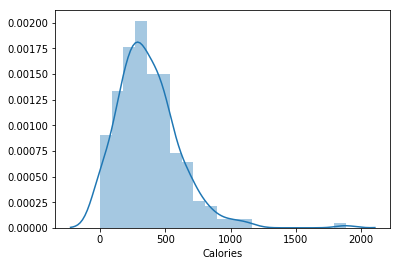

In [19]:
sns.distplot(menu['Calories'])

melihat outliers per/Kategori

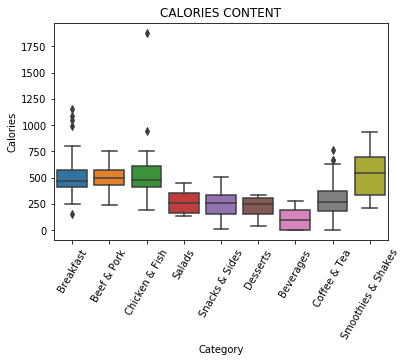

In [20]:
plot=sns.boxplot(x="Category",y="Calories",data=menu)
plt.setp(plot.get_xticklabels(),rotation=60)

plt.title('CALORIES CONTENT')
plt.show()

Kembali ke soal, maka average (rata rata numerik) kalori yg berasal dari menu adalah

Average Calories of Breakfast is: 470.0
Average Calories of Beef & Pork is: 500.0
Average Calories of Beverage is: 100.0
Average Calories of Coffe & Tea is: 270.0
Average Calories of Chicken & Fish is: 480.0
Average Calories of Deserts is: 250.0
Average Calories of Salads is: 255.0
Average Calories of Snacks & Sides is: 260.0
Average Calories of Smoothies & Shakes is: 540.0


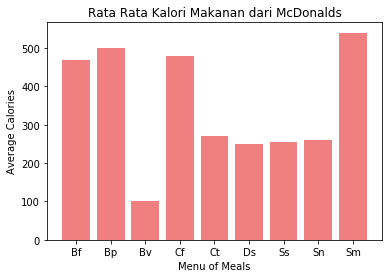

In [21]:
print('Average Calories of Breakfast is:', menu.loc[0:42].Calories.median()) #median())
mean_break = menu.loc[0:41].Calories.median()
print('Average Calories of Beef & Pork is:', menu.loc[42:56].Calories.median()) #median())
mean_bp = menu.loc[42:56].Calories.median()
print('Average Calories of Beverage is:', menu.loc[110:136].Calories.median())
mean_bv = menu.loc[110:136].Calories.median()
print('Average Calories of Coffe & Tea is:', menu.loc[137:231].Calories.median())
mean_ct = menu.loc[137:231].Calories.median()
print('Average Calories of Chicken & Fish is:', menu.loc[57:83].Calories.median()) #median())
mean_cf = menu.loc[57:83].Calories.median()
print('Average Calories of Deserts is:', menu.loc[103:109].Calories.median())
mean_ds = menu.loc[103:109].Calories.median()
print('Average Calories of Salads is:', menu.loc[84:89].Calories.median()) #median())
mean_ss = menu.loc[84:89].Calories.median()
print('Average Calories of Snacks & Sides is:', menu.loc[90:102].Calories.median()) #median())
mean_sn = menu.loc[90:102].Calories.median()
print('Average Calories of Smoothies & Shakes is:', menu.loc[232:259].Calories.median())
mean_sm = menu.loc[232:259].Calories.median()

x = ['Bf','Bp','Bv','Cf','Ct','Ds','Ss','Sn','Sm']
npm = np.array([mean_break,mean_bp,mean_bv,mean_cf,mean_ct,mean_ds,mean_ss,mean_sn,mean_sm])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightcoral')
plt.xlabel("Menu of Meals")
plt.ylabel("Average Calories")
plt.title("Rata Rata Kalori Makanan dari McDonalds")
plt.xticks(x_pos, x)
plt.show()

<h5>2. How much do beverages, like soda or coffee, contribute to the overall caloric intake?</h5>

Beverages (Minuman Bersoda) Berkontribusi Kurang/Lebih : 5.168350168350168 % Dari Keseluruhan Kalori yg Dibutuhkan Manusia


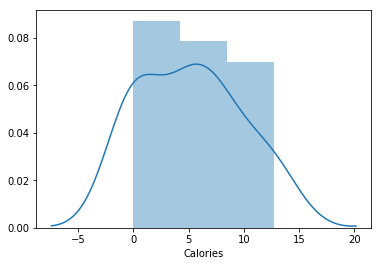

In [22]:
index1 = (menu.loc[110:136].Calories/2200) * 100
sns.distplot(index1)
print('Beverages (Minuman Bersoda) Berkontribusi Kurang/Lebih :',index1.mean(),'% Dari Keseluruhan Kalori yg Dibutuhkan Manusia')

kita lihat perbandingan kalori dari minuman bersoda ke semua menu

In [58]:
a = menu.Calories.sum()
b = menu.loc[110:136].Calories.sum()
c = (b / a)*100
print("kontribusi jenis beverage sebesar", c,"%")
print("Terhadap keseluruahan Menu")
print(a)
print(b)

kontribusi jenis beverage sebesar 3.2062663185378595 %
Terhadap keseluruahan Menu
95750
3070


<h5>3. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value? </h5>

<p>Disini saya ambil sample saja sbg perbandingan</p>
<p>Saya mulai dari kandungan jahat di makanan</p>

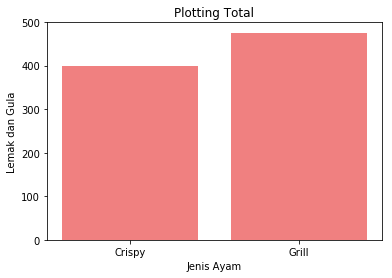

Total Lemak & Gula dari Ayam Crispy: 399.5
Total Lemak & Gula dari Ayam Bakar: 475.5


In [24]:
menu_chicken = menu.iloc[[57,58,59,60,61,62,74,75,76,77]]
menu_chicken = menu_chicken[['Saturated Fat','Cholesterol','Trans Fat','Sugars']]
total_jahat_crispy = menu_chicken.loc[57].sum() + menu_chicken.loc[59].sum() + menu_chicken.loc[61].sum() + menu_chicken.loc[74].sum() + menu_chicken.loc[76].sum()
total_jahat_grill = menu_chicken.loc[58].sum() + menu_chicken.loc[60].sum() + menu_chicken.loc[62].sum() + menu_chicken.loc[75].sum() + menu_chicken.loc[77].sum()

x = ['Crispy', 'Grill',]
npm = np.array([total_jahat_crispy, total_jahat_grill])
#plt.plot(npm)
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightcoral')
plt.xlabel("Jenis Ayam")
plt.ylabel("Lemak dan Gula")
plt.title("Plotting Total")
plt.xticks(x_pos, x)
plt.show()
print('Total Lemak & Gula dari Ayam Crispy:',total_jahat_crispy)
print('Total Lemak & Gula dari Ayam Bakar:',total_jahat_grill)

Kemudian dari Nutrisi yg Baik

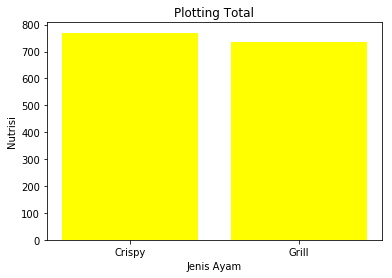

Total Nutrisi dari Ayam Crispy: 770
Total Nutrisi dari Ayam Bakar: 734


In [25]:
menu_chicken = menu.iloc[[57,58,59,60,61,62,74,75,76,77]]
menu_chicken2 = menu_chicken[['Carbohydrates','Dietary Fiber','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Iron (% Daily Value)']]

total_baik_crispy = menu_chicken2.loc[57].sum() + menu_chicken2.loc[59].sum() + menu_chicken2.loc[61].sum() + menu_chicken2.loc[74].sum() + menu_chicken2.loc[76].sum()
total_baik_grill = menu_chicken2.loc[58].sum() + menu_chicken2.loc[60].sum() + menu_chicken2.loc[62].sum() + menu_chicken2.loc[75].sum() + menu_chicken2.loc[77].sum()

x = ['Crispy', 'Grill',]
npm = np.array([total_baik_crispy, total_baik_grill])
#plt.plot(npm)
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='yellow')
plt.xlabel("Jenis Ayam")
plt.ylabel("Nutrisi")
plt.title("Plotting Total")
plt.xticks(x_pos, x)
plt.show()
print('Total Nutrisi dari Ayam Crispy:',total_baik_crispy)
print('Total Nutrisi dari Ayam Bakar:',total_baik_grill)

<h5>4. What about ordering egg whites instead of whole eggs?</h5>

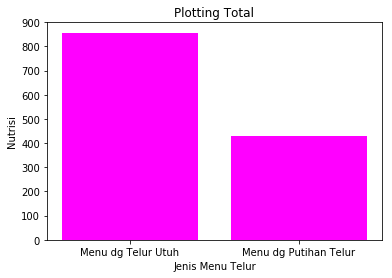

Total Nutrisi buruk dari Menu dg Telur Utuh: 857.0
Total Nutrisi buruk dari Menu dg Putihan  Telur: 429.0


In [26]:
telur = menu.iloc[[0,1,2,3,12,13,14,15,]]
telur1 = telur[['Saturated Fat','Cholesterol','Trans Fat','Sugars']]
#print(menu_chicken)
total_buruk_telur = telur1.loc[0].sum() + telur1.loc[2].sum() + telur1.loc[12].sum() + telur1.loc[13].sum()
total_buruk_putihan = telur1.loc[1].sum() + telur1.loc[3].sum() + telur1.loc[14].sum() + telur1.loc[15].sum()

x = ['Menu dg Telur Utuh', 'Menu dg Putihan Telur',]
npm = np.array([total_buruk_telur, total_buruk_putihan])
#plt.plot(npm)
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='magenta')
plt.xlabel("Jenis Menu Telur")
plt.ylabel("Nutrisi")
plt.title("Plotting Total")
plt.xticks(x_pos, x)
plt.show()
print('Total Nutrisi buruk dari Menu dg Telur Utuh:',total_buruk_telur)
print('Total Nutrisi buruk dari Menu dg Putihan  Telur:',total_buruk_putihan)

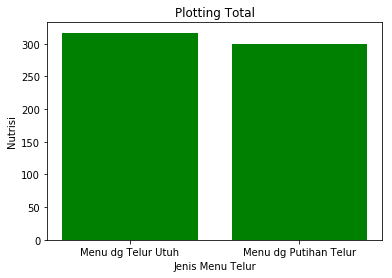

Total Nutrisi dari Menu baik dg Telur Utuh: 317
Total Nutrisi dari Menu baik dg Putihan  Telur: 300


In [27]:
telur = menu.iloc[[0,1,2,3,12,13,14,15,]]
telur1 = telur[['Carbohydrates','Dietary Fiber','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Iron (% Daily Value)']]
#print(menu_chicken)
total_baik_telur = telur1.loc[0].sum() + telur1.loc[2].sum() + telur1.loc[12].sum() + telur1.loc[13].sum()
total_baik_putihan = telur1.loc[1].sum() + telur1.loc[3].sum() + telur1.loc[14].sum() + telur1.loc[15].sum()

x = ['Menu dg Telur Utuh', 'Menu dg Putihan Telur',]
npm = np.array([total_baik_telur, total_baik_putihan])
#plt.plot(npm)
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='green')
plt.xlabel("Jenis Menu Telur")
plt.ylabel("Nutrisi")
plt.title("Plotting Total")
plt.xticks(x_pos, x)
plt.show()
print('Total Nutrisi dari Menu baik dg Telur Utuh:',total_baik_telur)
print('Total Nutrisi dari Menu baik dg Putihan  Telur:',total_baik_putihan)

<h5>5. What is the least number of items could you order from the menu to meet one day's nutritional requirements? Present the result in front of class</h5>

In [ ]:
#menu.set_index("Category", inplace=True)
menu.set_index = None
menu2 = menu[['Calories','Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Trans Fat', 
             'Cholesterol (% Daily Value)','Sodium (% Daily Value)','Carbohydrates (% Daily Value)'
            , 'Dietary Fiber (% Daily Value)','Sugars','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)'
             ,'Calcium (% Daily Value)','Iron (% Daily Value)']]
menu3 = menu2.groupby(['Category']).median()
menu3 = pd.DataFrame(menu3)
#print("nutrisi masing - masing menu : \n\n",menu3,"\n")


viz = menu3[['Calories','Sugars','Protein','Trans Fat'], menu3.index]
viz.hist()
plt.show()



dari tabel diatas dapat ditentukan bahwa kita bisa memesan 5 item untuk memenuhi kebutuhan harian dimana :
1. Beef & pork mampu memenuhi kebutuhan (total fat,trans fat,cholesterol,iron)
2. Breakfast mampu memenuhi kebutuhan (saturated fat,sodium)
3. Chicken & fish mampu memenuhi kebutuhan (protein)
4. salads mampu memenuhi kebutuhan ( Dietary Fiber,vitamin A,vitamin C)
5. Smotthies & Shakes mampu memenuhi kebutuhan ( calcium,carbohydrates,Calories,Sugars)

jika 5 item tersebut ditotal dan dilihat jumlah calories yang diperoleh menghasilkan 2245 kalori.
dan untuk wanita kalori yang diperlukan perhari yaitu 2000 kalori dan laki - laki yaitu 2500 kalori.

dan untuk menu diet yang mengandung banyak Dietary Fiber,Protein,Vitamin A,Vitamin C,Calcium,Iron
1. salad (Dietary fiber,Protein, Vitamin A,Vitamin c)
2. coffe & tea (mengandung banyak calcium dan rendah lemak dibanding smotthies & shakes)
3. chichken & fish ( mengandung cukup iron dalam sehari dan lebih rendah lemak dibanding beef & pork)

In [3]:
least=pd.DataFrame(menu.iloc[:, [1,3]])
p = len(least)

In [4]:
a=0
while a < p:
    print('Menu ke:',a)
    print("Menghitung Jumlah Minimal", least.iloc[a,0] ,"untuk dimakan agar mencukupi kebutuhan nutrisi harian")
    b=least.iloc[a,1]
    i=0

    while b<2200:
        b=b+least.iloc[a,1]
        i=i+1
        #print(b)
        if b == 0:
            b = 2201
    print("Harus Mengkonsumsi",i+1 ,"Kali",least.iloc[a,0],"Yang Jumlah Nutrisinya",least.iloc[a,1],' = ', (i+1)*least.iloc[a,1])
    a+=1

Menu ke: 0
Menghitung Jumlah Minimal Egg McMuffin untuk dimakan agar mencukupi kebutuhan nutrisi harian
Harus Mengkonsumsi 8 Kali Egg McMuffin Yang Jumlah Nutrisinya 300  =  2400
Menu ke: 1
Menghitung Jumlah Minimal Egg White Delight untuk dimakan agar mencukupi kebutuhan nutrisi harian
Harus Mengkonsumsi 9 Kali Egg White Delight Yang Jumlah Nutrisinya 250  =  2250
Menu ke: 2
Menghitung Jumlah Minimal Sausage McMuffin untuk dimakan agar mencukupi kebutuhan nutrisi harian
Harus Mengkonsumsi 6 Kali Sausage McMuffin Yang Jumlah Nutrisinya 370  =  2220
Menu ke: 3
Menghitung Jumlah Minimal Sausage McMuffin with Egg untuk dimakan agar mencukupi kebutuhan nutrisi harian
Harus Mengkonsumsi 5 Kali Sausage McMuffin with Egg Yang Jumlah Nutrisinya 450  =  2250
Menu ke: 4
Menghitung Jumlah Minimal Sausage McMuffin with Egg Whites untuk dimakan agar mencukupi kebutuhan nutrisi harian
Harus Mengkonsumsi 6 Kali Sausage McMuffin with Egg Whites Yang Jumlah Nutrisinya 400  =  2400
Menu ke: 5
Menghitung

# Kesimpulan :
#1. outlier akan memengaruhi pengambilan rata - rata menggunakan mean,jadi berdasarkan ilmu dasar statistika pencarian average bisa dengan menggunakan median untuk pengganti mean apabila terdapat outlier.
#2. Menu Beverages menyumbang 5,168 % kalori harian yang dibutuhkan manusia & menyumbang 3,206 % kalori dari semua menu
#3. jumlah kandungan nutrisi buruk ayam krispi lebih rendah dibanding ayam bakar & ayam krispi lebih mengandung banyak nutrisi baik
#4. jumlah kandungan nutrisi buruk telur lebih tinggi dibanding putih telur 
#5. Beef & pork menyumbang paling banyak lemak & kolesterol